In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Conversions from pixels to micron and microns to pixels

pixels = 225
microns = 100
scale = pixels/microns
M2P = scale
P2M = 1/scale

row_length = 1600*P2M
col_length = 1200*P2M


In [3]:
# set file path 
#initial test on one image

img =cv2.imread("E:/SS DATASET V2/1.jpg", 0)
ret, thresh = cv2.threshold(img,135,255,cv2.THRESH_BINARY)
Blur_Med_1_img = cv2.medianBlur(thresh,5)
Blur_Med_2_img = cv2.medianBlur(Blur_Med_1_img,5)
Blur_Med_3_img = cv2.medianBlur(Blur_Med_2_img,7)
Blur_Med_4_img = cv2.medianBlur(Blur_Med_3_img,7)

In [4]:
diff_x = np.diff(Blur_Med_4_img, axis=1)
diff_y = np.diff(Blur_Med_4_img, axis=0)

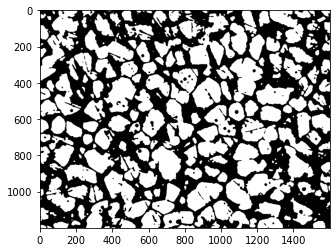

In [5]:
plt.imshow(Blur_Med_4_img, cmap='gray')
plt.show()

In [6]:
## Practice Block

# Choose the value to count (in this case, 1)
value = 255

# Initialize a counter
count = 0


# number of rows
numrows = 1200

# number of columns
numcols = 1600

Total_Grains_X = np.zeros(1200)

for x in range(numrows):
    # Initialize a counter
    count = 0
    # Iterate over the elements of the row
    for element in diff_x[x, :]:
        if element == value:
            count += 1
    Total_Grains_X[x] = count



In [7]:
print(Total_Grains_X)

[24. 22. 22. ... 15. 15. 15.]


In [8]:
Total_Grains_X.shape

(1200,)

In [9]:
# n = the number of files to sort through
n = 40

# Choose the value to count (in this case, 1)
value = 255

# Initialize a counter
count = 0

# number of rows
numrows = 1200

# number of columns
numcols = 1600

#zeros matrix for the grain measurements x = rows y = columns
Total_Grains_X = np.zeros((1200, 40))
Total_Grains_Y = np.zeros((1600, 40))

In [91]:
#Final For Loop For Line Intercept Method for manual threshold
# this loop will create the images from the initial
# this loop will save those images
# this loop will also record the grain intercept measurements

for t in range(n):

    img =cv2.imread("E:/SS DATASET V2/"+ str(t+1) + ".jpg", 0)
    ret, thresh = cv2.threshold(img,135,255,cv2.THRESH_BINARY)
    Blur_Med_1_img = cv2.medianBlur(thresh,5)
    Blur_Med_2_img = cv2.medianBlur(Blur_Med_1_img,5)
    Blur_Med_3_img = cv2.medianBlur(Blur_Med_2_img,7)
    Blur_Med_4_img = cv2.medianBlur(Blur_Med_3_img,7)
    
    _, binary = cv2.threshold(Blur_Med_4_img, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    black = np.zeros_like(img)
    
    for c in contours:
        # If the contour area is below the threshold, draw it on the black image
        if cv2.contourArea(c) > 100:
            cv2.drawContours(black, [c], -1, (255, 255, 255), -1)
            # Otherwise, draw it on the original image
        else:
             cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
                
    diff_x = np.diff(black, axis=1)
    diff_y = np.diff(black, axis=0)
    
    cv2.imwrite('D:/GS/FilteredTHRESHV2/FTHRESH' + str(t+1) + '.jpg', black)
    
    
    for x in range(numrows):
        # Initialize a counter
        count = 0
        # Iterate over the elements of the row
        for element in diff_x[x, :]:
            if element == value:
                count += 1
        Total_Grains_X[x, t] = count
        
    for y in range(numcols-1):
        # Initialize a counter
        count = 0
        # Iterate over the elements of the row
        for element in diff_y[:, y]:
            if element == value:
                count += 1
        Total_Grains_Y[y, t] = count


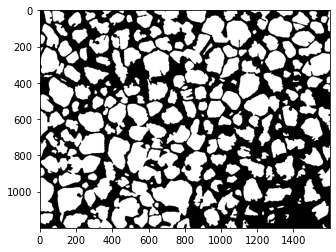

In [81]:
plt.imshow(black, cmap='gray')
plt.show()

In [ ]:
#delete row 1599 from AVG_GrainY_ManThresh (they are all 533.333 for some reason)

AVG_GrainY_ManThresh = np.delete(AVG_GrainY_ManThresh, 1599, axis=0)

In [74]:
#check for zeros
# if too many 0 the measurement did not work
value_zero = 0

# Initialize a counter
count = 0

#just change the X and Y and the col number (a lot of zeros is a bad measure)
for element in Total_Grains_Y[:,9]:
    if element == value_zero:
        count += 1
print(count)

0


In [19]:
# Save the numpy array as a CSV

# save the array to a CSV file
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/Total_Grains_Y_ManThresh.csv", Total_Grains_Y, delimiter=",")
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/Total_Grains_X_ManThresh.csv", Total_Grains_X, delimiter=",")

In [75]:
#set all the zeros to one for averaging purposes

Total_Grains_X[np.where(Total_Grains_X == 0)] = 1
Total_Grains_Y[np.where(Total_Grains_Y == 0)] = 1

In [76]:
AVG_GrainX_ManThresh = row_length/Total_Grains_X
AVG_GrainY_ManThresh = col_length/Total_Grains_Y

In [87]:
# Save the numpy array as a CSV

# save the array to a CSV file
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/AVG_GrainY_ManThresh.csv", AVG_GrainY_ManThresh, delimiter=",")
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/AVG_GrainX_ManThresh.csv", AVG_GrainX_ManThresh, delimiter=",")

In [88]:
meanX = np.mean(AVG_GrainX_ManThresh)
meanY = np.mean(AVG_GrainY_ManThresh)
STDX = np.std(AVG_GrainX_ManThresh)
STDY = np.std(AVG_GrainY_ManThresh)

In [89]:
print(meanX)
print(meanY)

41.44964961960775
42.28093317430619


In [90]:
print(STDX)
print(STDY)

6.427365422449625
7.592571907856701


In [65]:
import scipy.stats as stats